In [1]:
using LinearAlgebra
# using VMLS # can't find the package

## Chapter 3
# Norm and distance
### 3.1 Norm
**Norm.** The norm $‖x‖$ is written in Julia as `norm(x)`. (It can be evaluated several other ways, too.) The `norm` function is contained in the Julia package `LinearAlgebra`, so you must install and then add this package to use it; see page ix. 

In [2]:
x = [ 2, -1, 2 ];
norm(x), sqrt(x'*x), sqrt(sum(x.^2))

(3.0, 3.0, 3.0)

**Triangle inequality.** Let’s check the triangle inequality, $‖x+ y‖ ≤ ‖x‖+ ‖y‖$, for some specific values of $x$ and $y$.

In [3]:
x = randn(10); y = randn(10);
lhs = norm(x+y)
rhs = norm(x) + norm(y)
lhs,rhs

(2.633046475787544, 5.666299860769918)

**RMS value.** The RMS value of a vector $x$ is `rms(x)` $= \frac{‖x‖}{\sqrt{n}}$. In Julia, this is expressed as `norm(x)/sqrt(length(x))`. (The VMLS package contains this function, so you can use it once you’ve installed this package.)

Let’s define a vector (which represents a signal, i.e., the value of some quantity at uniform space time instances), and find its RMS value. The following code plots the signal, its average value, and two constant signals at `avg(x) ± rms(x)` (Figure [3.1](https://web.stanford.edu/~boyd/vmls/vmls.pdf#figure.3.1)).

In [4]:
using Statistics
avg = mean

mean (generic function with 6 methods)

In [5]:
rms(x) = norm(x) / sqrt(length(x));
t = 0:0.01:1; # List of times
x = cos.(8*t) - 2*sin.(11*t);
avg(x)

-0.04252943783238692

In [6]:
rms(x)

1.0837556422598

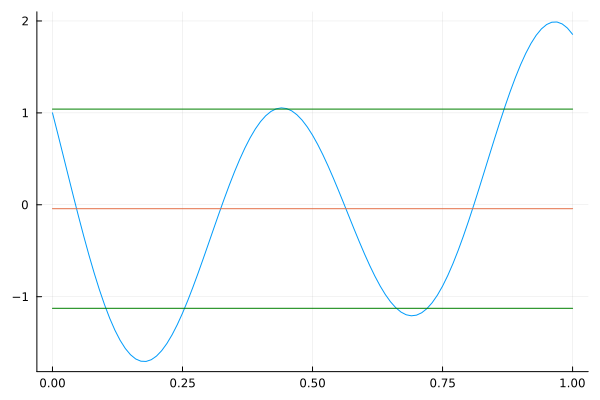

In [7]:
using Plots
plot(t, x)
plot!(t, avg(x)*ones(length(x)))
plot!(t, (avg(x)+rms(x))*ones(length(x)), color = :green)
plot!(t, (avg(x)-rms(x))*ones(length(x)), color = :green)
plot!(legend = false)

**Figure 3.1** A signal $x$. The horizontal lines show $avg(x) + rms(x)$, $avg(x)$ and $avg(x)− rms(x)$.

**Chebyshev inequality.** The Chebyshev inequality states that the number of entries of an $n$-vector $x$ that have absolute value at least $a$ is no more than $\frac{‖x‖^2}{a^2} = n rms(x)^2/a^2$. If this number is, say, $12.15$, we can conclude that no more that $12$ entries have absolute value at least $a$, since the number of entries is an integer. So the Chebyshev bound can be improved to be $floor(‖x‖^2/a)$, where $floor(u)$ is the integer part of a positive number. Let’s define a function with the Chebyshev bound, including the floor function improvement, and apply the bound to the signal found above, for a specific value of $a$.

In [8]:
# Define Chebyshev bound function
cheb_bound(x,a) = floor(norm(x)^2/a);
a = 1.5;
"Cheb bound:", cheb_bound(x,a)

("Cheb bound:", 79.0)

In [9]:
"Number of entries of x with |x_i| >= a:", sum(abs.(x) .>= a)

("Number of entries of x with |x_i| >= a:", 20)

In the last line, the expression `abs.(x) .>= a` creates an array with entries that are Boolean, i.e., `true` or `false`, depending on whether the corresponding entry of `x` satisfies the inequality. When we sum the vector of Booleans, they are automatically converted to (re-cast as) the numbers `1` and `0`, respectively.

### 3.2 Distance

**Distance.** The distance between two vectors is $dist(x, y) = ‖x − y‖$. This is written in Julia as `norm(x-y)`. Let’s find the distance between the pairs of the three vectors $u, v,$ and $w$ from page 49 of VMLS.

In [10]:
u = [1.8, 2.0, -3.7, 4.7];
v = [0.6, 2.1, 1.9, -1.4];
w = [2.0, 1.9, -4.0, 4.6];
norm(u-v), norm(u-w), norm(v-w)

(8.36779540858881, 0.3872983346207417, 8.532877591996735)

We can see that $u$ and $w$ are much closer to each other than $u$ and $v$, or $v$ and $w$.

**Nearest neighbor.** We define a function that calculates the nearest neighbor of a vector in a list of vectors, and try it on the points in Figure [3.3](https://web.stanford.edu/~boyd/vmls/vmls.pdf#figure.3.3) of VMLS.

In [11]:
nearest_neighbor(x,z) = z[ argmin([norm(x-y) for y in z]) ];
z = ( [2,1], [7,2], [5.5,4], [4,8], [1,5], [9,6] );
nearest_neighbor([5,6], z)

2-element Vector{Float64}:
 5.5
 4.0

In [12]:
nearest_neighbor([3,3], z)

2-element Vector{Int64}:
 2
 1

On the first line, the expression `[norm(x-y) for y in z]` uses a convenient construction in Julia. Here `z` is a list of vectors, and the expression expands to an array with elements `norm(x-z[1])`, `norm(x-z[2]), . . . .` The function `argmin` applied to this array returns the index of the smallest element. 

**De-meaning a vector.** We refer to the vector `x − avg(x)1` as the de-meaned version of `x`.

In [13]:
de_mean(x) = x .- avg(x); # Define de-mean function
x = [1, -2.2, 3];
avg(x)

0.6

In [14]:
x_tilde = de_mean(x)
avg(x_tilde)

-1.4802973661668753e-16

(The mean of $x̃$ is very very close to zero.)

### 3.3 Standard deviation
**Standard deviation.** We can define a function that corresponds to the VMLS definition of the standard deviation of a vector, $std(x) =$ $\frac{‖x − avg(x)1‖}{\sqrt{n}}$, where $n$ is the length of the vector.

In [15]:
x = rand(100);
# VMLS definition of std
stdev(x) = norm(x.-avg(x))/sqrt(length(x));
stdev(x)

0.29782524789447706

This function is in the VMLS package, so you can use it once you’ve installed this package. (Julia’s Statistics package has a similar function, `std(x)`, which computes the value $\frac{‖x − avg(x)1‖}{\sqrt{n − 1}}$, where $n$ is the length of $x$.) 

**Return and risk.** We evaluate the mean return and risk (measured by standard deviation) of the four time series Figure [3.4](https://web.stanford.edu/~boyd/vmls/vmls.pdf#figure.3.4) of VMLS.

In [16]:
a = ones(10);
b = [ 5, 1, -2, 3, 6, 3, -1, 3, 4, 1 ];
c = [ 5, 7, -2, 2, -3, 1, -1, 2, 7, 8 ];
d = [ -1, -3, -4, -3, 7, -1, 0, 3, 9, 5 ];

[("char,avg, std"),
("a", avg(a), stdev(a)), 
("b", avg(b), stdev(b)),
("c", avg(c), stdev(c)),
("d", avg(d), stdev(d))]

5-element Vector{Any}:
 "char,avg, std"
 ("a", 1.0, 0.0)
 ("b", 2.3, 2.41039415863879)
 ("c", 2.6, 3.773592452822641)
 ("d", 1.2, 4.308131845707603)

**Standardizing a vector.** If a vector $x$ isn’t constant (i.e., at least two of its entries are different), we can standardize it, by subtracting its mean and dividing by its standard deviation. The resulting standardized vector has mean value zero and RMS value one. Its entries are called $z-scores$. We’ll define a standardize function, and then check it with a random vector.

In [17]:
function standardize(x)
x_tilde = x .- avg(x) # De-meaned vector
return x_tilde/rms(x_tilde)
end

standardize (generic function with 1 method)

In [18]:
x = rand(100);
z = standardize(x);

[("x:", avg(x), rms(x)), ("z:", avg(z), rms(z))]

2-element Vector{Tuple{String, Float64, Float64}}:
 ("x:", 0.49068572611006744, 0.558593099319593)
 ("z:", -1.0658141036401502e-16, 1.0000000000000002)

The mean or average value of the standarized vector $z$ is very nearly zero.

### 3.4 Angle
**Angle.** Let’s define a function that computes the angle between two vectors. We will call it ang because Julia already includes a function angle (for the phase angle of a complex number).

In [19]:
# Define angle function, which returns radians
ang(x,y) = acos(x'*y/(norm(x)*norm(y)));
a = [1,2,-1]; b=[2,0,-3];

[(ang(a,b),":angle in radians"), 
(ang(a,b)*(360/(2*pi)), ":angle in degrees")]

2-element Vector{Tuple{Float64, String}}:
 (0.9689825515916383, ":angle in radians")
 (55.51861062801842, ":angle in degrees")

**Correlation coefficient.** The correlation coefficient between two vectors $a$ and $b$ (with nonzero standard deviation) is defined as $$ρ = \frac{ã^Tb̃}{‖ã‖‖b̃‖},$$ where $ã$ and $b̃$ are the de-meaned versions of $a$ and $b$, respectively. There is no built-in function for correlation, so we can define one. We use function to calculate the correlation coefficients of the three pairs of vectors in Figure [3.8](https://web.stanford.edu/~boyd/vmls/vmls.pdf#figure.3.8) in VMLS.

In [20]:
function correl_coef(a,b)
a_tilde = a .- avg(a)
b_tilde = b .- avg(b)
return (a_tilde'*b_tilde)/(norm(a_tilde)*norm(b_tilde))
end

correl_coef (generic function with 1 method)

In [21]:
a0 = [4.4, 9.4, 15.4, 12.4, 10.4, 1.4, -4.6, -5.6, -0.6, 7.4];
b0 = [6.2, 11.2, 14.2, 14.2, 8.2, 2.2, -3.8, -4.8, -1.8, 4.2];
a1 = [4.1, 10.1, 15.1, 13.1, 7.1, 2.1, -2.9, -5.9, 0.1, 7.1];
b1 = [5.5, -0.5, -4.5, -3.5, 1.5, 7.5, 13.5, 14.5, 11.5, 4.5];
a2 = [-5.0, 0.0, 5.0, 8.0, 13.0, 11.0, 1.0, 6.0, 4.0, 7.0];
b2 = [5.8, 0.8, 7.8, 9.8, 0.8, 11.8, 10.8, 5.8, -0.2, -3.2];

In [22]:
[("0",correl_coef(a0,b0)),
("1",correl_coef(a1,b1)),
("2",correl_coef(a2,b2))]

3-element Vector{Tuple{String, Float64}}:
 ("0", 0.9678196342570434)
 ("1", -0.9875211120643734)
 ("2", 0.004020976661367035)

The correlation coefficients of the three pairs of vectors are $96.8\%, −98.8\%$, and $0.4\%$.

### 3.5 Complexity 
Let’s check that the time to compute the correlation coefficient of two $n$-vectors is approximately linear in $n$.

In [23]:
x0 = randn(10^6); y0 = randn(10^6);
x1 = randn(10^7); y1 = randn(10^7);

[("time for 0:", @time correl_coef(x0,y0), 
@time correl_coef(x0,y0)), 
("time for 1:", @time correl_coef(x1,y1), 
@time correl_coef(x1,y1))]

  0.007683 seconds (14 allocations: 15.259 MiB)
  0.021202 seconds (8.34 k allocations: 31.193 MiB, 32.02% compilation time)
  0.135515 seconds (14 allocations: 152.588 MiB, 55.11% gc time)
  0.311179 seconds (180 allocations: 305.189 MiB, 59.49% gc time)


2-element Vector{Tuple{String, Tuple{Float64, Float64}}}:
 ("time for 0:", (0.0003371135220152918, 0.0003371135220152918))
 ("time for 1:", (-0.00037907554834920934, -0.00037907554834920934))